In [1]:
import os, sys 
import numpy as np 
import cupy as cp 
from tensorflow.keras.datasets.mnist import load_data as load_mnist
from tensorflow.keras.datasets.cifar10 import load_data as load_cifar
sys.path.append('/home/oneran/机器学习课设/cifar-10/Photon')
from layers import * 
from ResidualModel import * 
from Model import * 
from DenseNet import *
from optimizers import * 
from utils import * 
import matplotlib.pyplot as plt

# Mnist数据集

In [2]:
(X_train, Y_train), (X_test, Y_test) = load_mnist()
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
def to_category(labels, classes=10):
    categories = np.zeros((len(labels), classes)) 
    for i in range(len(categories)):
        categories[i, labels[i]] = 1
    return categories
if X_train.shape[0] == 50000:
    data = X_train / 255.
    label = to_category(Y_train, 10)
else:
    data = np.expand_dims(X_train / 255., axis=-1)
    label = to_category(Y_train, 10)

Epoch: 0 Step: 1 Loss: 2.3019419383383175
Epoch: 0 Step: 11 Loss: 2.261711845925751
Epoch: 0 Step: 21 Loss: 2.3231911992476233
Epoch: 0 Step: 31 Loss: 2.2857642643068523
Epoch: 0 Step: 41 Loss: 2.331355085573133
Epoch: 0 Step: 51 Loss: 2.2948519532193137
Epoch: 0 Step: 61 Loss: 2.1362192986396416
Epoch: 0 Step: 71 Loss: 2.1693232011560477
Epoch: 0 Step: 81 Loss: 2.171362853905099
Epoch: 0 Step: 91 Loss: 2.1311722226667165
Epoch: 0 Step: 101 Loss: 2.163415827745
Epoch: 0 Step: 111 Loss: 2.098351225421997
Epoch: 0 Step: 121 Loss: 2.131003291567371
Epoch: 0 Step: 131 Loss: 2.053352794073231
Epoch: 0 Step: 141 Loss: 2.152851099492297
Epoch: 0 Step: 151 Loss: 2.0446457956303434
Epoch: 0 Step: 161 Loss: 2.018716328497743
Epoch: 0 Step: 171 Loss: 2.022317127301198
Epoch: 0 Step: 181 Loss: 1.980413434030606
Epoch: 0 Step: 191 Loss: 2.0088045202719034
Epoch: 0 Step: 201 Loss: 1.8532034066471093
Epoch: 0 Step: 211 Loss: 1.8533856941153364
Epoch: 0 Step: 221 Loss: 1.7840784301383754
Epoch: 0 Step

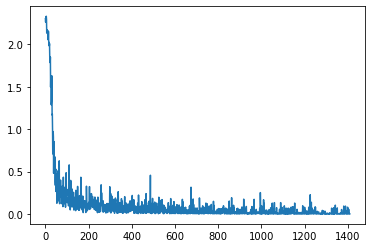

Score is 0.9859333333333333
Score is 0.9699519230769231


In [4]:
model = ResNet(datasets='mnist', opt='sgd')
model.datas = [data, label]
model.train(15)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/sgd_mnist_ResNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_ResNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Epoch: 0 Step: 1 Loss: 2.3033163603370657
Epoch: 0 Step: 11 Loss: 2.26627104794916
Epoch: 0 Step: 21 Loss: 2.322913212612204
Epoch: 0 Step: 31 Loss: 2.2949498052595843
Epoch: 0 Step: 41 Loss: 2.1890450527230634
Epoch: 0 Step: 51 Loss: 2.252209773329572
Epoch: 0 Step: 61 Loss: 2.1419523588920484
Epoch: 0 Step: 71 Loss: 2.1795005036833794
Epoch: 0 Step: 81 Loss: 2.123324651209615
Epoch: 0 Step: 91 Loss: 2.08160206908867
Epoch: 0 Step: 101 Loss: 2.189156392142857
Epoch: 0 Step: 111 Loss: 2.1093265456916863
Epoch: 0 Step: 121 Loss: 2.1699222679528902
Epoch: 0 Step: 131 Loss: 2.01245559359466
Epoch: 0 Step: 141 Loss: 2.058408000820503
Epoch: 0 Step: 151 Loss: 2.123694463165793
Epoch: 0 Step: 161 Loss: 1.994322863576484
Epoch: 0 Step: 171 Loss: 2.041516530642294
Epoch: 0 Step: 181 Loss: 2.015633222945067
Epoch: 0 Step: 191 Loss: 2.0320221870197024
Epoch: 0 Step: 201 Loss: 2.0837961300856103
Epoch: 0 Step: 211 Loss: 1.9652175445025337
Epoch: 0 Step: 221 Loss: 2.2578398887682405
Epoch: 0 Step:

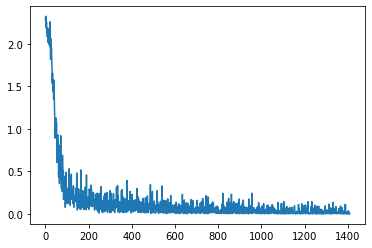

Score is 0.9760333333333333
Score is 0.961738782051282


In [5]:
model = ConvNet(datasets='mnist', opt='sgd')
model.datas = [data, label]
model.train(15)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/sgd_mnist_ConvNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_ConvNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Epoch: 0 Step: 1 Loss: 2.3031780564871465
Epoch: 0 Step: 11 Loss: 2.2264225782079694
Epoch: 0 Step: 21 Loss: 2.3025087324242506
Epoch: 0 Step: 31 Loss: 2.122275184828082
Epoch: 0 Step: 41 Loss: 2.000779618374798
Epoch: 0 Step: 51 Loss: 2.0720483191195624
Epoch: 0 Step: 61 Loss: 2.0549649783310695
Epoch: 0 Step: 71 Loss: 2.0237443425726087
Epoch: 0 Step: 81 Loss: 2.049522499766515
Epoch: 0 Step: 91 Loss: 2.1088937464254984
Epoch: 0 Step: 101 Loss: 2.0102458710364814
Epoch: 0 Step: 111 Loss: 2.0894018307277626
Epoch: 0 Step: 121 Loss: 2.017222489637224
Epoch: 0 Step: 131 Loss: 2.0292460225920244
Epoch: 0 Step: 141 Loss: 2.0243227306997973
Epoch: 0 Step: 151 Loss: 2.363813202719985
Epoch: 0 Step: 161 Loss: 2.004977612020025
Epoch: 0 Step: 171 Loss: 2.0962749138628833
Epoch: 0 Step: 181 Loss: 2.0287733400168535
Epoch: 0 Step: 191 Loss: 1.996801862011595
Epoch: 0 Step: 201 Loss: 2.184842858563539
Epoch: 0 Step: 211 Loss: 2.0071192119934285
Epoch: 0 Step: 221 Loss: 2.016500424169612
Epoch: 0

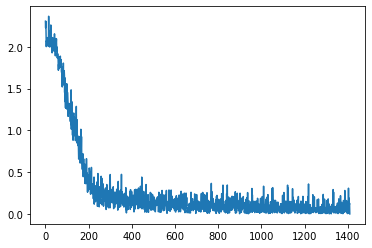

Score is 0.9691833333333333
Score is 0.9565304487179487


In [6]:
model = DenseNet(datasets='mnist', opt='sgd')
model.datas = [data, label]
model.train(15)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/sgd_mnist_DenseNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_DenseNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

In [2]:
(X_train, Y_train), (X_test, Y_test) = load_cifar()
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [3]:
def to_category(labels, classes=10):
    categories = np.zeros((len(labels), classes)) 
    for i in range(len(categories)):
        categories[i, labels[i]] = 1
    return categories
if X_train.shape[0] == 50000:
    data = X_train / 255.
    label = to_category(Y_train, 10)
else:
    data = np.expand_dims(X_train / 255., axis=-1)
    label = to_category(Y_train, 10)

Epoch: 0 Step: 1 Loss: 2.3022017862208433
Epoch: 0 Step: 11 Loss: 2.294055489660327
Epoch: 0 Step: 21 Loss: 2.3250514869242576
Epoch: 0 Step: 31 Loss: 2.2988682906458453
Epoch: 0 Step: 41 Loss: 2.283671302834675
Epoch: 0 Step: 51 Loss: 2.2743738217248577
Epoch: 0 Step: 61 Loss: 2.256334426968931
Epoch: 0 Step: 71 Loss: 2.3161723575573285
Epoch: 0 Step: 81 Loss: 2.2474506009661193
Epoch: 0 Step: 91 Loss: 2.295746533858763
Epoch: 0 Step: 101 Loss: 2.1338193795936897
Epoch: 0 Step: 111 Loss: 2.109405535329227
Epoch: 0 Step: 121 Loss: 2.146160487493793
Epoch: 0 Step: 131 Loss: 2.2076817661448325
Epoch: 0 Step: 141 Loss: 2.2668878081278696
Epoch: 0 Step: 151 Loss: 2.136367733060723
Epoch: 0 Step: 161 Loss: 2.107168269618567
Epoch: 0 Step: 171 Loss: 2.1292822930656072
Epoch: 0 Step: 181 Loss: 2.066944474869809
Epoch: 0 Step: 191 Loss: 2.1804508824348625
Epoch: 0 Step: 201 Loss: 2.056368846744255
Epoch: 0 Step: 211 Loss: 2.1413688103896966
Epoch: 0 Step: 221 Loss: 2.1868135035181115
Epoch: 0 

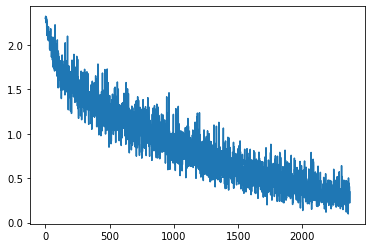

ValueError: too many values to unpack (expected 4)

In [4]:
model = ResNet(datasets='cifar_10', opt='sgd')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/sgd_cifar_ResNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_ResNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

In [4]:
model = ResNet('cifar_10', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_ResNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Score is 0.8396486875800256
Score is 0.6153846153846154


# Cifar数据集 

Epoch: 0 Step: 1 Loss: 2.302198497337784
Epoch: 0 Step: 11 Loss: 2.2941209385511536
Epoch: 0 Step: 21 Loss: 2.3676486491415245
Epoch: 0 Step: 31 Loss: 2.317250169730839
Epoch: 0 Step: 41 Loss: 2.313184019750444
Epoch: 0 Step: 51 Loss: 2.240961586021591
Epoch: 0 Step: 61 Loss: 2.3009356718599556
Epoch: 0 Step: 71 Loss: 2.348367209402832
Epoch: 0 Step: 81 Loss: 2.2322179123548764
Epoch: 0 Step: 91 Loss: 2.3208661619049122
Epoch: 0 Step: 101 Loss: 2.2251975609606225
Epoch: 0 Step: 111 Loss: 2.2473436590946516
Epoch: 0 Step: 121 Loss: 2.244464809052661
Epoch: 0 Step: 131 Loss: 2.2393856777350107
Epoch: 0 Step: 141 Loss: 2.3159147354141405
Epoch: 0 Step: 151 Loss: 2.2231281676362857
Epoch: 0 Step: 161 Loss: 2.217623472759496
Epoch: 0 Step: 171 Loss: 2.1683150640656494
Epoch: 0 Step: 181 Loss: 2.183780294796272
Epoch: 0 Step: 191 Loss: 2.271454695846306
Epoch: 0 Step: 201 Loss: 2.1194082786822435
Epoch: 0 Step: 211 Loss: 2.211706065959497
Epoch: 0 Step: 221 Loss: 2.252048838321432
Epoch: 0 S

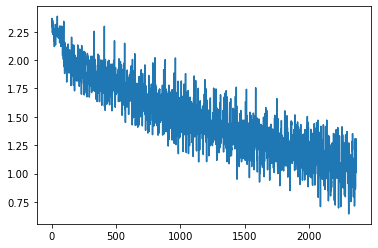

Score is 0.5899887964148528
Score is 0.5048076923076923


In [5]:
model = ConvNet(datasets='cifar_10', opt='sgd')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/sgd_cifar_ConvNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_ConvNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Epoch: 0 Step: 1 Loss: 2.3034792587407815
Epoch: 0 Step: 11 Loss: 2.2245911324851892
Epoch: 0 Step: 21 Loss: 2.211808113451973
Epoch: 0 Step: 31 Loss: 2.327209005250241
Epoch: 0 Step: 41 Loss: 2.2319318883309927
Epoch: 0 Step: 51 Loss: 2.294719458136324
Epoch: 0 Step: 61 Loss: 2.258798667022867
Epoch: 0 Step: 71 Loss: 2.223196322667733
Epoch: 0 Step: 81 Loss: 2.276926794565632
Epoch: 0 Step: 91 Loss: 2.2607011228332916
Epoch: 0 Step: 101 Loss: 2.2417500901176486
Epoch: 0 Step: 111 Loss: 2.1441854119933828
Epoch: 0 Step: 121 Loss: 2.1950606159681296
Epoch: 0 Step: 131 Loss: 2.2356172012123086
Epoch: 0 Step: 141 Loss: 2.2314743024694876
Epoch: 0 Step: 151 Loss: 2.3323989249768644
Epoch: 0 Step: 161 Loss: 2.17648172014861
Epoch: 0 Step: 171 Loss: 2.22092836464189
Epoch: 0 Step: 181 Loss: 2.1617478213670185
Epoch: 0 Step: 191 Loss: 2.159667632675195
Epoch: 0 Step: 201 Loss: 2.1792803058070236
Epoch: 0 Step: 211 Loss: 2.2738051029903157
Epoch: 0 Step: 221 Loss: 2.2616023809686663
Epoch: 0 S

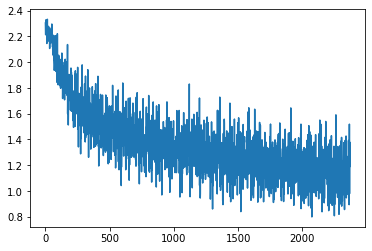

FileNotFoundError: [Errno 2] No such file or directory: '/home/oneran/机01器学习课设/cifar-10/Photon/sgd_cifar_DenseNet.pkl'

In [6]:
model = DenseNet(datasets='cifar_10', opt='sgd')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()

In [7]:
np.savetxt('/home/oneran/Downloads/sgd_cifar_DenseNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_DenseNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Score is 0.5875680217669654
Score is 0.488681891025641


# 用RMSprop跑跑看

Epoch: 0 Step: 1 Loss: 2.3020723067279136
Epoch: 0 Step: 11 Loss: 2.3326882140497016
Epoch: 0 Step: 21 Loss: 2.349317606022593
Epoch: 0 Step: 31 Loss: 2.2980925004265984
Epoch: 0 Step: 41 Loss: 2.1110592762084135
Epoch: 0 Step: 51 Loss: 2.1740229780339124
Epoch: 0 Step: 61 Loss: 2.1480222713858064
Epoch: 0 Step: 71 Loss: 2.054963279548372
Epoch: 0 Step: 81 Loss: 2.1134797488185915
Epoch: 0 Step: 91 Loss: 1.99990673924755
Epoch: 0 Step: 101 Loss: 1.975162010230237
Epoch: 0 Step: 111 Loss: 1.8456292330555466
Epoch: 0 Step: 121 Loss: 1.8277156216371915
Epoch: 0 Step: 131 Loss: 2.177903304028172
Epoch: 0 Step: 141 Loss: 2.398981965178815
Epoch: 0 Step: 151 Loss: 1.782457342375361
Epoch: 0 Step: 161 Loss: 1.966299188996214
Epoch: 0 Step: 171 Loss: 1.9809524528171274
Epoch: 0 Step: 181 Loss: 1.803694062595353
Epoch: 0 Step: 191 Loss: 1.8369279972234875
Epoch: 0 Step: 201 Loss: 1.910824635861491
Epoch: 0 Step: 211 Loss: 2.020558754679972
Epoch: 0 Step: 221 Loss: 1.9974675870998637
Epoch: 0 St

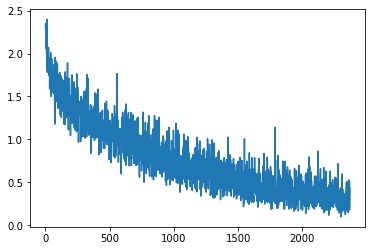

Score is 0.8429097311139565
Score is 0.6481370192307693


In [4]:
model = ResNet(datasets='cifar_10', opt='rmsprop')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/rmsprop_cifar_ResNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ResNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Epoch: 0 Step: 1 Loss: 2.3019728679370335
Epoch: 0 Step: 11 Loss: 2.3614226566692067
Epoch: 0 Step: 21 Loss: 2.425474199043677
Epoch: 0 Step: 31 Loss: 2.3199717347934663
Epoch: 0 Step: 41 Loss: 2.300047590474624
Epoch: 0 Step: 51 Loss: 2.253036676581023
Epoch: 0 Step: 61 Loss: 2.310242261736249
Epoch: 0 Step: 71 Loss: 2.3349101047743934
Epoch: 0 Step: 81 Loss: 2.384478650177856
Epoch: 0 Step: 91 Loss: 2.4261706985194
Epoch: 0 Step: 101 Loss: 2.3111997284514567
Epoch: 0 Step: 111 Loss: 2.3487904279917893
Epoch: 0 Step: 121 Loss: 2.319989730457805
Epoch: 0 Step: 131 Loss: 2.2706889652315914
Epoch: 0 Step: 141 Loss: 2.3643423186098724
Epoch: 0 Step: 151 Loss: 2.168953777857044
Epoch: 0 Step: 161 Loss: 2.15173586730816
Epoch: 0 Step: 171 Loss: 2.142543011908139
Epoch: 0 Step: 181 Loss: 2.2005444165234955
Epoch: 0 Step: 191 Loss: 2.1320039275148064
Epoch: 0 Step: 201 Loss: 2.2204059637837483
Epoch: 0 Step: 211 Loss: 2.0720384670325878
Epoch: 0 Step: 221 Loss: 2.192977526666052
Epoch: 0 Step

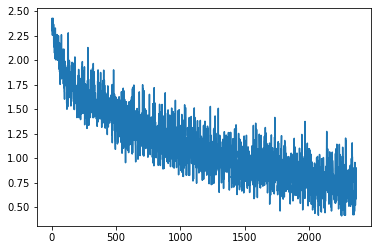

Score is 0.7049055697823303
Score is 0.5902443910256411


In [5]:
model = ConvNet(datasets='cifar_10', opt='rmsprop')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/rmsprop_cifar_ConvNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ConvNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

Epoch: 0 Step: 1 Loss: 2.302228605921952
Epoch: 0 Step: 11 Loss: 2.1087662762629336
Epoch: 0 Step: 21 Loss: 2.1109067065281413
Epoch: 0 Step: 31 Loss: 2.161732685350877
Epoch: 0 Step: 41 Loss: 1.982668839775914
Epoch: 0 Step: 51 Loss: 2.0456770062166263
Epoch: 0 Step: 61 Loss: 2.0362046573186507
Epoch: 0 Step: 71 Loss: 2.1565009098173955
Epoch: 0 Step: 81 Loss: 2.0414956114243235
Epoch: 0 Step: 91 Loss: 2.1433563760094314
Epoch: 0 Step: 101 Loss: 2.006755673105668
Epoch: 0 Step: 111 Loss: 1.8976900292415575
Epoch: 0 Step: 121 Loss: 1.9402479330706885
Epoch: 0 Step: 131 Loss: 2.0988739345169782
Epoch: 0 Step: 141 Loss: 2.1263757060429684
Epoch: 0 Step: 151 Loss: 1.7198300110714573
Epoch: 0 Step: 161 Loss: 1.8746017802958772
Epoch: 0 Step: 171 Loss: 1.918234715023806
Epoch: 0 Step: 181 Loss: 1.8472263046874522
Epoch: 0 Step: 191 Loss: 1.7682191581360112
Epoch: 0 Step: 201 Loss: 1.674746827944819
Epoch: 0 Step: 211 Loss: 1.8723123816745262
Epoch: 0 Step: 221 Loss: 1.958796403238034
Epoch:

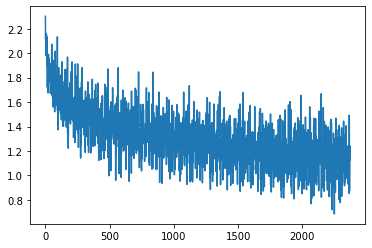

Score is 0.5936299615877081
Score is 0.49048477564102566


In [6]:
model = DenseNet(datasets='cifar_10', opt='rmsprop')
model.datas = [data, label]
model.train(30)
plt.plot(np.arange(len(model.history)), model.history)
plt.show()
np.savetxt('/home/oneran/Downloads/rmsprop_cifar_DenseNet_history.txt', model.history)
model.save_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_DenseNet.pkl')
score, pred = model.score(X_train, Y_train)
score, pred = model.score(X_test, Y_test)

In [ ]:
# model = ConvNet()
# model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ConvNet.pkl')
# score, pred = model.score(X_train, Y_train)
# score, pred = model.score(X_test, Y_test)

In [ ]:
# model = ResNet()
# model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ResNet.pkl')
# score, pred = model.score(X_train, Y_train)
# score, pred = model.score(X_test, Y_test)

In [ ]:
# model = DenseNet('cifar_10')
# model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_DenseNet.pkl')
# score, pred = model.score(X_train, Y_train)
# score, pred = model.score(X_test, Y_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

In [ ]:
# confu_mat = confusion_matrix(Y_test[:len(pred)].flatten(), np.array(pred).flatten())
# np.sum(confu_mat * np.eye(10)) / len(pred)

In [ ]:
# sns.heatmap(confu_mat)